<a href="https://colab.research.google.com/github/globalpie271/mask_classification/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Preprocessing

In [20]:
PATH = r'gdrive/My Drive/Colab Notebooks/face_recognition/'
SRC_PATH = PATH + 'src/'
DATA_PATH = PATH + 'data/'
IMAGES_PATH = DATA_PATH + 'images/'
MASKS_PATH = IMAGES_PATH + 'masks/'

TRAIN_PATH = MASKS_PATH + 'train/'
TEST_PATH = MASKS_PATH + 'test/'
VALIDATION_PATH = MASKS_PATH + 'validation/'

MODELS_PATH = DATA_PATH + 'models/'
PLOT_PATH = DATA_PATH + 'plot/'

In [21]:
!pwd
!find gdrive/My\ Drive/Colab\ Notebooks/face_recognition/data/images/masks/train -type f | wc -l
!find gdrive/My\ Drive/Colab\ Notebooks/face_recognition/data/images/masks/test -type f | wc -l
!find gdrive/My\ Drive/Colab\ Notebooks/face_recognition/data/images/masks/validation -type f | wc -l

/content
10440
992
800


In [22]:
!pip install -q -U tensorflow-addons

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
# import keras
from tensorflow.keras import models, layers
from PIL import Image
import matplotlib.pyplot as plt
import math
import os
import matplotlib.pyplot as plt

## Creating generators

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (160, 160)
train_batch_size = 800

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator  = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = image_size,
    batch_size = train_batch_size,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_PATH,
    target_size = image_size,
    batch_size = 512,
    class_mode = 'binary')

test_dataset = image_dataset_from_directory(
    TEST_PATH,
    batch_size=32,
    image_size = image_size)

Found 10440 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 files belonging to 2 classes.


# Train model

In [31]:
test_model = models.Sequential()
test_model.add(layers.Conv2D(16,(3,3), padding = 'same',activation = 'relu', input_shape = (160,160,3)))
test_model.add(layers.Conv2D(32,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.MaxPool2D())
test_model.add(layers.Conv2D(64,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.Conv2D(64,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.MaxPool2D())
test_model.add(layers.Conv2D(128,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.Conv2D(128,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.MaxPool2D())
test_model.add(layers.Conv2D(256,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.Conv2D(256,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.MaxPool2D())
test_model.add(layers.Conv2D(256,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.Conv2D(256,(3,3), padding = 'valid',activation = 'relu'))
test_model.add(layers.MaxPool2D())

test_model.add(layers.Flatten())


test_model.add(layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)))

In [33]:
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 160, 160, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 158, 158, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 77, 77, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 35, 35, 128)      

In [36]:
epochs = 10
history = test_model.fit(train_generator,
              epochs=epochs,
              validation_data=validation_generator
              )


Epoch 1/10
14/14 [==============================] - 42s 3s/step - loss: 0.3528 - val_loss: 0.2312
Epoch 2/10
14/14 [==============================] - 40s 3s/step - loss: 0.2313 - val_loss: 0.2150
Epoch 3/10
14/14 [==============================] - 40s 3s/step - loss: 0.2155 - val_loss: 0.2097
Epoch 4/10
14/14 [==============================] - 41s 3s/step - loss: 0.2096 - val_loss: 0.2074
Epoch 5/10
14/14 [==============================] - 39s 3s/step - loss: 0.2074 - val_loss: 0.2056
Epoch 6/10
14/14 [==============================] - 40s 3s/step - loss: 0.2060 - val_loss: 0.2050
Epoch 7/10
14/14 [==============================] - 40s 3s/step - loss: 0.2050 - val_loss: 0.2044
Epoch 8/10
14/14 [==============================] - 40s 3s/step - loss: 0.2043 - val_loss: 0.2041
Epoch 9/10
14/14 [==============================] - 42s 3s/step - loss: 0.2038 - val_loss: 0.2035
Epoch 10/10
14/14 [==============================] - 41s 3s/step - loss: 0.2033 - val_loss: 0.2031


# Plot

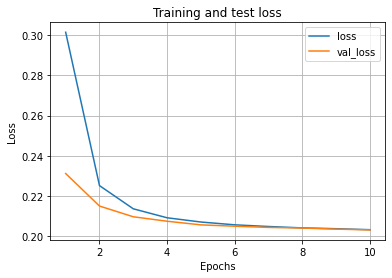

In [136]:
# epochs = 14
number = 0
training_number = '_train_' + str(number)
epochs_range = range(1,epochs+1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs_range, loss,label = 'loss')
plt.plot(epochs_range, val_loss,label = 'val_loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
# plt.savefig(PLOT_FOLDER_PATH + model_name + training_number + '.pdf',bbox_inches='tight')
# plt.savefig(PLOT_FOLDER_PATH + model_name + training_number + '.png',bbox_inches='tight')


# Test model

In [114]:
def k_nearest(x, images,labels,model,k = 5):
  '''
  k nearest function
  Args:
    x (tf.Tensor): image for which label should be defined
    images: images for k nearest algorithm
    labels: labels of given images
    model: tensorflow model for predicting
    k: number of neighbours
  
  Raises:
    ValueError: if k is even

  Returns:
    tf.Tensor: tensor of shape (1,) (if x without mask then [1] else [0])
  '''
  if k%2==0: raise ValueError('k should be odd')

  predict = model.predict(images)
  x = model.predict(tf.stack([x]))
  x = tf.reshape(x, [-1,])
  confidence = 1/tf.norm(x-predict, axis = 1)
  sorted_indices = tf.argsort(confidence,direction='DESCENDING')
  
  result = tf.zeros([1])
  with_mask_confidence, without_mask_confidence = tf.zeros([1]), tf.zeros([1])
  sorted_labels = tf.map_fn(lambda x: labels[x], sorted_indices)
  without_mask_number = tf.reduce_sum(sorted_labels[0:k])
  # print(labels)
  # print(sorted_indices)
  # print(sorted_labels)
  # print(without_mask_number)

  without_mask_number = tf.cast(without_mask_number, tf.float32)

  return tf.where(without_mask_number > tf.floor(tf.constant([k/2])),tf.constant(1), tf.constant(0))

In [134]:
for batch in test_dataset:
  break

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)


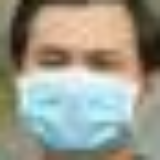

In [135]:
print(batch[1][0])
result = k_nearest((batch[0][0]/255.).numpy(),batch[0][1:]/255., batch[1][1:], test_model, k = 7)
print(result)
array_to_img(batch[0][0])